# Quadratic Regression

## Quadratic Regression with Numpy functions

Using built-in numpy functions is the simplest way to do quadratic and polynomial regression.

First, we import the numpy, sklearn, and matplotlib libraries required.

In [1]:
import numpy.random # for generating a noisy data set
from sklearn import linear_model # model fitting/training
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot # for plotting in general

Next, we define the range of X values for our function (-10 — 10), and we set the number of inputs (50).

In [2]:
MIN_X = -10
MAX_X = 10
NUM_INPUTS = 50

### Data Generation

Next, we generate the data that we're going to use. We're going to need some noise to make our data slightly more random, we'll need the array of x values that we are using, and the corresponding y values.

In [3]:
# Generate some normally distributed noise
noise = numpy.random.normal(size=NUM_INPUTS)

### 1 feature (2D)

# randomly pick 50 numbers
x1 = numpy.random.uniform(low=MIN_X, high=MAX_X, size=(NUM_INPUTS, 1))

# x needs to be an array of arrays for the model fit function, but sometimes we also need it as a list.
# The [:,0] slicing pulls out the values into a one-dimensional list
x1_1d = x1[:,0]

# y = 0.7x^2 - 0.4x + 1.5
y1_2 = 0.7 * x1_1d * x1_1d - 4 * x1_1d + 1.5 + noise

Please note how the y data is generate with the noise added on the end to make it slightly off of the perfect fit line.

### Training our Model

Next, we use the numpy.polyfit function to fit a best-fit line to our data.

In [4]:
modelQuad = numpy.polyfit(x1_1d, y1_2, 2)

We then print out the coefficients, which should be close to 0.7, -4, and 1.4.

In [5]:
print('2D Data: ^2 Coefficient: {0}  ^1 Coefficient: {1} Intercept: {2}'.format(modelQuad[0], modelQuad[1], modelQuad[2]))

2D Data: ^2 Coefficient: 0.7046790979447421  ^1 Coefficient: -3.978946542478776 Intercept: 1.4103447756731862


### Plotting the data using matplotlib

We then plot the data using matplotlib. First, we add the points to our plot.

In [6]:
fig = matplotlib.pyplot.figure(1)
fig.suptitle('2D Data and Numpy Best-Fit Line')
matplotlib.pyplot.xlabel('x')
matplotlib.pyplot.ylabel('y')

matplotlib.pyplot.scatter(x1_1d, y1_2)

Then we plot the best-fit line.

In [7]:
X = numpy.linspace(MIN_X, MAX_X)
Y = numpy.polyval(modelQuad, X)
matplotlib.pyplot.plot(X, Y)

Finally, we reveal the plot!

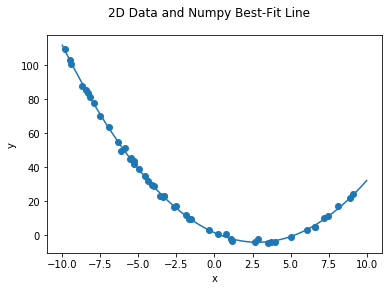

In [8]:
matplotlib.pyplot.show()

Voila! The best fit line, at least using numpy.polyfit, acts as a great way to analyze and run OLS regression on quadratic and general polynomial data!

## Quadratic Regression with a linear model

Let's assume we could only use a linear model. How would we then run quadratic regression?

Well, I found a great Stack Overflow post Here: https://stackoverflow.com/questions/33710829/linear-regression-with-quadratic-terms. Essentially, this post talks about using the built it linear regression for a 2d plane, whereas instead of accounting for 2 X variables, you assume one of those variables is X and one is X^2. That way, it will generate coefficients that solve for Y based on the two variables, however you will still be able to use a linear regression model.

First, we must create a linear regression model to examine our data with.

In [9]:
model2d = linear_model.LinearRegression()

Next we create a numpy array of the two powers of X we will be using for our variables (1 & 2), and we fit our model as a 2d plane with X & X^2.

In [10]:
p = numpy.array([1, 2])
model2d.fit(x1 ** p, y1_2)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

By fitting the model with x1^p, which returns a 2d dimensional array (where the first column is x1 and the second is x1^2), the model assumes it's working with 3 dimensional data. This is not the case, and the coefficients it thinks it is using for 3d modelling is actually for a quadratic function.

In [11]:
print('2D Data: Intercept: {0}  Coefficients: {1}'.format(model2d.intercept_, model2d.coef_))
quadcoef = list(reversed(model2d.coef_)) + [model2d.intercept_]
print(quadcoef)

2D Data: Intercept: 1.4103447756731988  Coefficients: [-3.97894654  0.7046791 ]
[0.70467909794474248, -3.9789465424787767, 1.4103447756731988]


Here, you can see that although it's right about the intercepts and the coefficients, we need to do a bit of array analysis (found via a simple stack overflow/google search) to convert it into the 3 coefficient list needed by numpy.polyval.



Next, we can plot our points on a new matplotlib.

In [12]:
skfig = matplotlib.pyplot.figure(0)
skfig.suptitle('2D Data and Linear Regression Best-Fit Line')
matplotlib.pyplot.xlabel('x')
matplotlib.pyplot.ylabel('y')

# put the generated points on the graph
matplotlib.pyplot.scatter(x1_1d, y1_2)

We then can plot the best fit line by running polyfit on the `quadcoef` variable created earlier.

In [13]:
X = numpy.linspace(MIN_X, MAX_X)
Y = numpy.polyval(quadcoef, X)
matplotlib.pyplot.plot(X, Y)

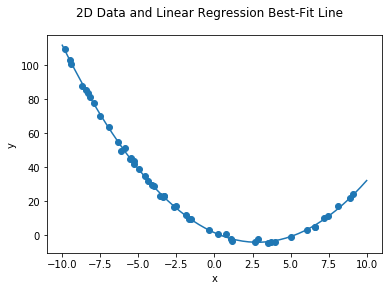

In [14]:
matplotlib.pyplot.show()

It works! As far as I can tell it is just as accurate as the previous model, though I'd have to learn how to extract the R value for a more detailed description. 